In [229]:
import json
import urllib
import pandas as pd
import numpy as np
import requests
import re
from imdbpie import Imdb

import nltk
from nltk.tokenize import RegexpTokenizer
import collections
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

from IPython.display import Image
import pydot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [184]:
df = pd.read_csv('../../assets/capstone-assets/CCRPI/master15Cluster.csv')

In [185]:
df2 = pd.read_csv('../../assets/capstone-assets/CCRPI/master.csv')

In [186]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(1)

,year,sysID,sysName,schoolID,schoolName,adress,latitude,longitude,grd,ccrpi,titleI,chrtr,cluster
0,2015,601,Appling County,103,Appling County High School,"482 Blackshear Hwy,Baxley,Ga,31513",31.757758,-82.354021,H,73.6,No,No,1


In [187]:

df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.head(1)

,year,sysID,sysName,schoolID,schoolName,grd,ccrpi,street,city,county,state,zip,locClass,titleI,chrtr,totStudnts,crprlPun,dtntn,iss,oss,altSchl,physRest,busSusp,explsn,other_discipline_action,pctDisc,bully,disCond,gngRel,hom,sexRelated,drugAlc,weapons,thftRbry,violence,pctBehavrs,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,2015,601,Appling County,103,Appling County High School,H,73.6,482 Blackshear Hwy,Baxley,Appling County,GA,31513,33.0,No,No,1063,0,0,349,90,10,0,8,0,103,0.429915,0,304,2,0,7,41,2,3,43,0.378175,16.4,5721.49,18817718.34,726.0,0.0,0.10668,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8


In [188]:
pd.set_option('display.max_columns', None)
df2.head(1)

,year,sysID,sysName,schoolID,schoolName,grd,ccrpi,street,city,county,state,zip,locClass,titleI,chrtr,totStudnts,crprlPun,dtntn,iss,oss,altSchl,physRest,busSusp,explsn,other_discipline_action,pctDisc,bully,disCond,gngRel,hom,sexRelated,drugAlc,weapons,thftRbry,violence,pctBehavrs,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd
0,2015,601,Appling County,103,Appling County High School,H,73.6,482 Blackshear Hwy,Baxley,Appling County,GA,31513,33.0,No,No,1063,0,0,349,90,10,0,8,0,103,0.429915,0,304,2,0,7,41,2,3,43,0.378175,16.4,5721.49,18817718.34,726.0,0.0,0.10668,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8


In [189]:
data = pd.merge(df2, df, how='inner', on=['year', 'sysID','sysName', 'schoolID','schoolName','grd','ccrpi','titleI','chrtr'])

In [190]:
rprtCrd = []

In [191]:
for row in data['ccrpi']:
    if row >= 90:
        rprtCrd.append('A')
    elif row >= 80:
        rprtCrd.append('B')
    elif row >= 70:
        rprtCrd.append('C')
    elif row >= 60:
        rprtCrd.append('D')
    else:
        rprtCrd.append('F')

In [192]:
data['rprtCrd'] = rprtCrd

In [193]:
data.head()

,year,sysID,sysName,schoolID,schoolName,grd,ccrpi,street,city,county,state,zip,locClass,titleI,chrtr,totStudnts,crprlPun,dtntn,iss,oss,altSchl,physRest,busSusp,explsn,other_discipline_action,pctDisc,bully,disCond,gngRel,hom,sexRelated,drugAlc,weapons,thftRbry,violence,pctBehavrs,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd,adress,latitude,longitude,cluster,rprtCrd
0,2015,601,Appling County,103,Appling County High School,H,73.6,482 Blackshear Hwy,Baxley,Appling County,GA,31513,33.0,No,No,1063,0,0,349,90,10,0,8,0,103,0.429915,0,304,2,0,7,41,2,3,43,0.378175,16.4,5721.49,18817718.34,726.0,0.0,0.106680,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8,"482 Blackshear Hwy,Baxley,Ga,31513",31.757758,-82.354021,1,C
1,2015,601,Appling County,177,Appling County Elementary School,E,68.8,680 Blackshear Hwy,Baxley,Appling County,GA,31513,33.0,Yes,No,619,29,0,0,15,0,0,7,0,1,0.082391,0,0,0,0,1,0,3,0,10,0.022617,14.3,4936.78,18817718.34,480.0,1.0,0.093857,55.1,38.6,6.3,46,1,0,29,19,4,47,7,12.8,8.7,0.0,2.0,"680 Blackshear Hwy,Baxley,Ga,31513",31.754824,-82.354584,3,D
2,2015,601,Appling County,195,Appling County Middle School,M,68.8,2997 Blackshear Hwy,Baxley,Appling County,GA,31513,41.0,Yes,No,826,34,0,159,33,3,10,8,0,4,0.299031,4,8,0,0,7,5,1,2,39,0.079903,15.6,5703.74,18817718.34,553.0,0.0,0.102865,48.1,41.2,10.8,38,1,0,22,12,4,62,4,11.2,1.4,2.2,7.0,"2997 Blackshear Hwy,Baxley,Ga,31513",31.723121,-82.339760,3,D
3,2015,601,Appling County,1050,Altamaha Elementary School,E,72.3,344 Altamaha School Rd,Baxley,Appling County,GA,31513,42.0,Yes,No,361,40,0,0,0,0,0,1,0,0,0.113573,0,3,0,0,0,0,0,0,0,0.008310,14.9,6076.04,18817718.34,264.0,0.0,0.105128,44.9,42.7,12.5,34,0,0,6,6,2,86,2,13.2,4.1,0.0,6.2,"344 Altamaha School Rd,Baxley,Ga,31513",31.875677,-82.365238,3,C
4,2015,601,Appling County,5050,Fourth District Elementary School,E,68.2,13396 Blackshear Hwy,Surrency,Appling County,GA,31563,43.0,Yes,No,164,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,0,0,0,0,1,0,0.006098,14.2,5533.32,18817718.34,130.0,0.0,0.121387,43.3,45.7,11.0,33,0,0,9,9,5,78,5,8.6,2.6,0.0,2.0,"13396 Blackshear Hwy,Surrency,Ga,31563",31.611834,-82.247988,3,D


In [194]:
df2.columns

Index([u'year', u'sysID', u'sysName', u'schoolID', u'schoolName', u'grd',
       u'ccrpi', u'street', u'city', u'county', u'state', u'zip', u'locClass',
       u'titleI', u'chrtr', u'totStudnts', u'crprlPun', u'dtntn', u'iss',
       u'oss', u'altSchl', u'physRest', u'busSusp', u'explsn',
       u'other_discipline_action', u'pctDisc', u'bully', u'disCond', u'gngRel',
       u'hom', u'sexRelated', u'drugAlc', u'weapons', u'thftRbry', u'violence',
       u'pctBehavrs', u'stdTchRatio', u'expPerStudent', u'salBenSum',
       u'freeLnch', u'reducedLnch', u'pctMobile', u'pctAbs5orLess',
       u'pctAbsSix-Fiftn', u'pctOverFiftn', u'pctSnapTanfHmls', u'pctAsian',
       u'pctNative', u'pctBlck', u'pctHisp', u'pctMulti', u'pctWhite',
       u'pctMigrant', u'pctSPED', u'pctESOL', u'pctAltProg', u'pctGiftd'],
      dtype='object')

In [195]:
# Regroup features

features = df2[['titleI','chrtr','stdTchRatio','expPerStudent','salBenSum','freeLnch','reducedLnch','pctMobile',
               'pctAbs5orLess','pctAbsSix-Fiftn','pctOverFiftn','pctSnapTanfHmls','pctAsian','pctNative',
               'pctBlck','pctHisp','pctMulti','pctWhite','pctMigrant','pctSPED','pctESOL','pctAltProg','pctGiftd',
               'pctDisc','pctBehavrs']]

In [196]:
features.head(1)

,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd,pctDisc,pctBehavrs
0,No,No,16.4,5721.49,18817718.34,726.0,0.0,0.10668,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8,0.429915,0.378175


In [197]:
# Apply MinMaxScaler to numeric columns that are not already in percentages

scaler = MinMaxScaler()

features[['stdTchRatio', 'expPerStudent','salBenSum','freeLnch','reducedLnch']] = scaler.fit_transform(features[['stdTchRatio', 'expPerStudent','salBenSum','freeLnch','reducedLnch']])

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [198]:
features.head(1)

,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd,pctDisc,pctBehavrs
0,No,No,0.00441,0.284628,0.021683,0.297907,0.0,0.10668,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8,0.429915,0.378175


In [199]:
X = features

In [200]:
# Forgot to change titleI and charter to integers

X.ix[:,0] = X.ix[:,0].map({'No': 0, 'Yes': 1} )
X.ix[:,1] = X.ix[:,1].map({'No': 0, 'Yes': 1} )

In [201]:
# Forgot to fill in the missing values for percent of gifted students

X['pctGiftd'].fillna((X['pctGiftd'].mean()), inplace=True)

In [202]:
# We need to regroup our features, but specify our y as the report card grade
le = LabelEncoder()
yClass = le.fit_transform(data['rprtCrd'])

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, yClass, test_size=0.3, random_state=42)

In [204]:
# Initiate GridSearch - it just may be that it's not max_depth that will get us the best model, but a certain
# combination of the model's possible parameters

PARAMETERS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]}
SCORING = 'mean_squared_error'

In [205]:
X.head(1)

,titleI,chrtr,stdTchRatio,expPerStudent,salBenSum,freeLnch,reducedLnch,pctMobile,pctAbs5orLess,pctAbsSix-Fiftn,pctOverFiftn,pctSnapTanfHmls,pctAsian,pctNative,pctBlck,pctHisp,pctMulti,pctWhite,pctMigrant,pctSPED,pctESOL,pctAltProg,pctGiftd,pctDisc,pctBehavrs
0,0,0,0.00441,0.284628,0.021683,0.297907,0.0,0.10668,41.6,38.2,20.2,30,1,0,22,11,2,64,4,12.7,1.3,6.8,6.8,0.429915,0.378175


In [206]:
#We use Grid Search to find optimal values for each paramter
clfModel = DecisionTreeClassifier()
clf = GridSearchCV(clfModel, PARAMETERS, scoring=SCORING, n_jobs=-1)
clf.fit(X, yClass)

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_
print np.sqrt(-clf.best_score_)

# Be sure to inrepret the scores below for your best model (are these good or bad?)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=3, max_leaf_nodes=5, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
-0.915560276155
0.956849139705


In [207]:
# GridSearch provides us with the optimal parameters, so we fit our model with those parameters

treeclf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=4, max_leaf_nodes=8, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=4, max_leaf_nodes=8, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [227]:
cv=KFold(len(yClass), shuffle=False)
treeclfScore = cross_val_score(treeclf, X,yClass, cv=cv)
print treeclfScore.mean()

0.38502524406


In [230]:
rf = RandomForestClassifier(random_state=5)
rfScore = cross_val_score(rf, X,yClass, cv=cv)
rfScore
print "The decision tree classifier's score was", treeclfScore.mean()
print "The random forest regressor's score was", rfScore.mean()

The decision tree classifier's score was 0.38502524406
The random forest regressor's score was 0.409993329202


In [231]:
ab = AdaBoostClassifier(random_state=5)

abScore = cross_val_score(ab, X,yClass, cv=cv)
abScore
print "The decision tree regressor's score was", treeclfScore.mean()
print "The random forest regressor's score was", rfScore.mean()
print "The adaboost regressor's score was", abScore.mean()

The decision tree regressor's score was 0.38502524406
The random forest regressor's score was 0.409993329202
The adaboost regressor's score was 0.439205159202


In [239]:
# PARAMETERS2 = {'max_depth':[1,2,3,4,5,6],'min_samples_leaf':[1,2,3,4]}
# SCORING2 = 'mean_squared_error'

In [242]:
# so the AdaBoostClassifier is our best bet so far. Let's do grid search with this, instead, for optimal parameters

# abcModel = AdaBoostClassifier()
# abc = GridSearchCV(abcModel, scoring=SCORING2, n_jobs=-1)
# abc.fit(X, yClass)

In [245]:
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=5)

In [246]:
# compute the feature importances

pd.DataFrame({'Feature':X.columns,
              'Importance':ab.feature_importances_}).sort_values('Importance', ascending=False).head(6)

,Feature,Importance
11,pctSnapTanfHmls,0.18
10,pctOverFiftn,0.18
17,pctWhite,0.10
7,pctMobile,0.08
15,pctHisp,0.06
22,pctGiftd,0.06


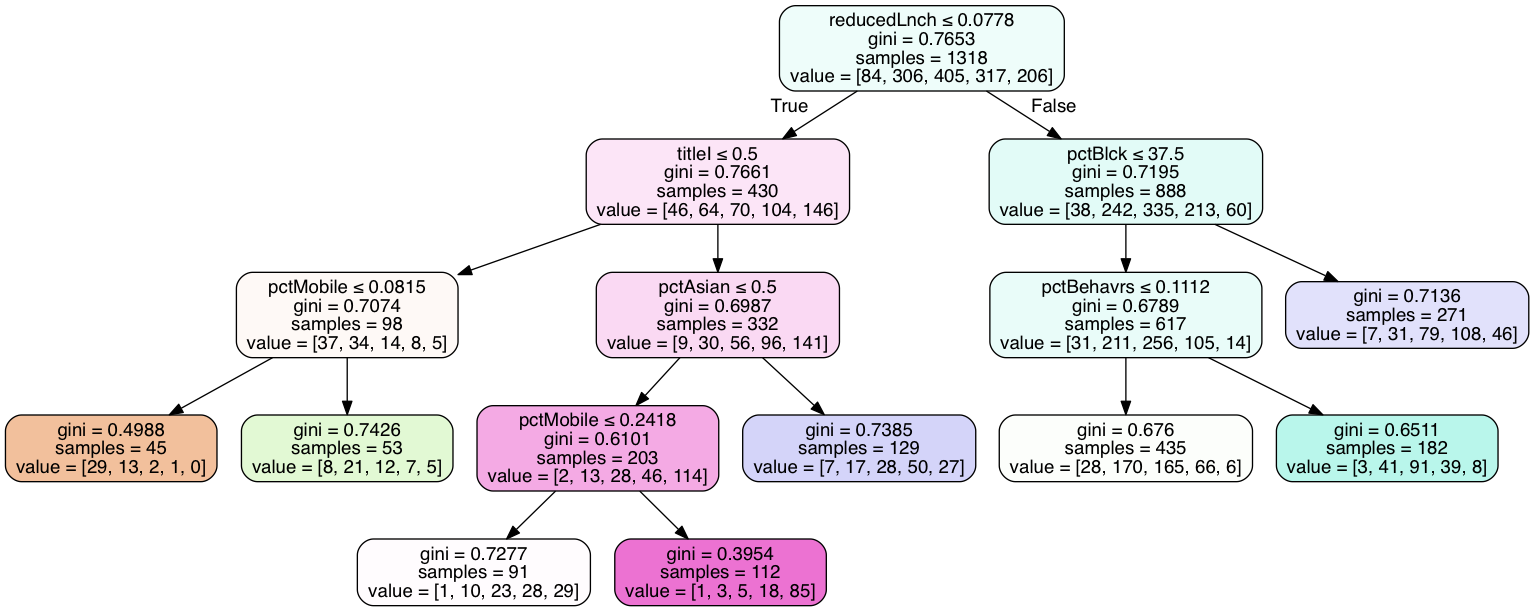

In [248]:
dot_data = StringIO()  
export_graphviz(treeclf, out_file=dot_data,  
                feature_names=X.columns,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [249]:
# predict class labels for the test set
predicted = ab.predict(X_test)
print predicted

[1 1 1 0 1 1 3 4 3 2 0 0 2 0 0 4 2 2 3 2 2 2 2 2 2 1 1 3 4 4 0 3 1 2 2 2 3
 0 0 2 2 0 0 1 2 4 1 2 4 2 2 2 2 4 0 3 4 2 2 1 3 2 2 0 3 2 4 2 4 2 2 3 0 0
 2 2 0 2 2 4 3 0 4 2 2 1 1 1 2 1 2 3 4 1 2 2 1 2 3 2 2 2 4 0 1 4 4 1 3 1 2
 3 0 2 2 3 4 4 1 2 3 1 0 2 1 4 3 2 2 4 0 1 3 2 0 4 0 2 2 0 1 1 3 2 0 1 1 2
 2 3 1 4 0 4 2 2 4 3 2 0 0 2 2 3 4 2 2 1 2 3 1 4 2 0 0 2 4 3 2 2 2 0 2 2 1
 0 1 4 3 3 2 3 2 1 2 3 2 3 1 0 3 1 1 4 2 1 2 2 3 3 4 0 1 3 2 2 2 1 4 2 3 1
 1 3 2 1 0 3 3 0 4 2 2 0 2 3 2 4 4 2 3 4 3 2 4 1 3 3 3 1 4 2 2 1 2 3 2 1 0
 2 1 4 2 3 3 2 3 2 4 2 0 4 1 2 1 4 4 0 3 1 1 0 1 4 2 4 3 2 3 2 2 3 2 2 4 4
 1 1 0 4 0 4 1 4 4 4 1 1 2 0 2 1 3 1 2 3 0 2 4 0 2 2 4 4 3 2 3 2 4 3 2 0 3
 3 0 1 2 4 0 1 0 2 4 4 2 0 2 2 3 0 4 2 1 2 1 2 2 0 1 3 2 3 3 2 2 3 3 2 2 1
 2 4 3 4 3 4 1 3 4 2 2 0 2 1 2 4 0 3 1 1 4 3 1 3 2 3 2 4 2 1 0 0 1 1 3 0 3
 2 4 3 4 2 3 2 2 2 0 3 2 0 2 3 2 2 3 2 3 0 4 2 4 2 2 3 0 1 0 4 0 4 1 2 2 2
 2 2 4 4 4 0 1 1 1 1 1 3 2 0 1 0 4 0 4 3 3 2 2 0 3 4 1 2 2 4 3 3 0 3 3 0 2
 2 2 4 3 1 1 2 2 2 1 1 0 

In [250]:
# generate class probabilities - this will be useful for our confusion plot below

probs = ab.predict_proba(X_test)

In [251]:
probDf = pd.DataFrame(probs, columns=['probA','probB','probC','probD','probF'])

In [252]:
probDf.head(1)

,probA,probB,probC,probD,probF
0,0.175286,0.240527,0.228503,0.239954,0.11573


In [253]:
probDf['actual'] = y_test

In [254]:
# generate evaluation metrics

print "Accuracy score is", metrics.accuracy_score(y_test, predicted)
 # print "Area under the curve is", metrics.roc_auc_score(y_test, probs[:, 1])

Accuracy score is 0.433628318584


In [255]:
print metrics.classification_report(y_test, predicted)

             precision    recall  f1-score   support

          0       0.34      0.74      0.46        38
          1       0.38      0.28      0.32       127
          2       0.46      0.49      0.47       177
          3       0.48      0.36      0.41       139
          4       0.48      0.54      0.51        84

avg / total       0.44      0.43      0.43       565



In [256]:
print confusion_matrix(y_test, predicted)

[[28  8  2  0  0]
 [38 36 45  8  0]
 [ 8 40 86 26 17]
 [ 7  7 44 50 31]
 [ 2  5 11 21 45]]
